# Graded Challenge 1
## i. Introduction
Nama : Darmawan Wijaya </br>
Kelas : FTDS - 002 </br>
Obyektif : Mengaplikasikan konsep regresi linear untuk memprediksi harga/price dari dataset

## ii. Import Pustaka
Pustaka yang digunakan pada proyek ini adalah:</br>
1. Numpy
2. Pandas
3. Scikit Learn
4. Matplotlib

In [1]:
#Proses import dari pustaka yang digunakan
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#Kode tambahan untuk menampilkan angka desimal maksimal 5 angka dibelakang koma sehingga angka lebih mudah dipahami
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## iii. Data Loading
Data yang digunakan adalah data penggunaan uber dan lyft untuk area Boston yang berisi: </br>
1. Waktu order
2. Harga
3. Jarak
4. Jenis Layanan
5. Sumber dan Tujuan
6. Suhu udara
7. Kondisi angin
8. Dan parameter-parameter lainnya</br>

Data tersebut dapat diunduh pada : https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma


In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [3]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,693071.00000,693071.00000,693071.00000,693071.00000,637976.00000,693071.00000,693071.00000,693071.00000,693071.00000,693071.00000,...,693071.00000,693071.00000,693071.00000,693071.00000,693071.00000,693071.00000,693071.00000,693071.00000,693071.00000,693071.00000
mean,1544045709.75510,11.61914,17.79436,11.58668,16.54513,2.18943,1.01387,42.33817,-71.06615,39.58439,...,0.03737,1544043966.24300,33.45777,1544041609.57016,45.26131,1544047300.03131,29.73100,1544048034.74045,41.99734,1544047993.94983
std,689192.49259,6.94811,9.98229,0.49243,9.32436,1.13894,0.09164,0.04784,0.02030,6.72608,...,0.05521,691202.76727,6.46722,690195.44141,5.64505,690135.33719,7.11049,687186.19149,6.93684,691077.65198
min,1543203646.00000,0.00000,1.00000,11.00000,2.50000,0.02000,1.00000,42.21480,-71.10540,18.91000,...,0.00000,1543161600.00000,15.63000,1543122000.00000,33.51000,1543154400.00000,11.81000,1543136400.00000,28.95000,1543186800.00000
25%,1543443968.00000,6.00000,13.00000,11.00000,9.00000,1.28000,1.00000,42.35030,-71.08100,36.45000,...,0.00000,1543420800.00000,30.17000,1543399200.00000,42.57000,1543438800.00000,27.76000,1543399200.00000,36.57000,1543438800.00000
50%,1543737478.00000,12.00000,17.00000,12.00000,13.50000,2.16000,1.00000,42.35190,-71.06310,40.49000,...,0.00040,1543770000.00000,34.24000,1543726800.00000,44.68000,1543788000.00000,30.13000,1543744800.00000,40.95000,1543788000.00000
75%,1544827509.00000,18.00000,28.00000,12.00000,22.50000,2.92000,1.00000,42.36470,-71.05420,43.58000,...,0.09160,1544806800.00000,38.88000,1544788800.00000,46.91000,1544814000.00000,35.71000,1544788800.00000,44.12000,1544817600.00000
max,1545160511.00000,23.00000,30.00000,12.00000,97.50000,7.86000,3.00000,42.36610,-71.03300,57.22000,...,0.14590,1545152400.00000,43.10000,1545192000.00000,57.87000,1545109200.00000,40.05000,1545134400.00000,57.20000,1545109200.00000


## iv. Data Cleaning
Data cleaning adalah proses penyiapan data sebelum dilakukan eksplorasi dan pengolahan data lebih lanjut. </br>
Proses data cleaning yang digunakan pada proyek ini adalah: </br>
1. Pengecekan Data Duplikat
2. Pengecekan Missing Values

In [4]:
#Proses Pengecekan Data Duplikat
duplicate = df[df.duplicated()]
duplicate

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


Dari hasil pengecekan data duplikat, tidak ditemukan adanya data duplikat

In [5]:
#Proses pengecekan missing values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dari hasil pengecekan missing values, ditemukan 55095 missing values pada kolom 'price' </br>
Untuk missing values tersebut kemudian akan didrop  

In [6]:
#Data dengan missing values akan kami simpan terlebih dahulu
missing = df[df.isnull().any(axis=1)]
missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55095 entries, 18 to 693068
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           55095 non-null  object 
 1   timestamp                    55095 non-null  float64
 2   hour                         55095 non-null  int64  
 3   day                          55095 non-null  int64  
 4   month                        55095 non-null  int64  
 5   datetime                     55095 non-null  object 
 6   timezone                     55095 non-null  object 
 7   source                       55095 non-null  object 
 8   destination                  55095 non-null  object 
 9   cab_type                     55095 non-null  object 
 10  product_id                   55095 non-null  object 
 11  name                         55095 non-null  object 
 12  price                        0 non-null      float64
 13  distance      

In [7]:
#Proses penghapusan baris yang memiliki missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

## v. Eksplorasi Data
Eksplorasi data yang kami lakukan adalah:
1. Melakukan perhitungan Measure of Central Tendency dari parameter price
2. Melakukan perhitungan Distribution and Density dari parameter price
3. Melakukan perhitungan Measure of Variability dari dari parameter price
4. Melakukan plotting data dari parameter price

In [8]:
#Measure of Central Tendency
print("Mean of price :", df['price'].mean())
print("Median of price :", df['price'].median())
print("Mode of price :", df['price'].mode())

Mean of price : 16.545125490614065
Median of price : 13.5
Mode of price : 0   7.00000
dtype: float64


In [9]:
#Distribution and Density
print("Skewness of price :", df['price'].skew())
print("Kurtosis of price :", df['price'].kurt())

Skewness of price : 1.0457470560899258
Kurtosis of price : 1.2248292540626262


In [10]:
#Measure of Variability
print("Range of price :", df['price'].max()-df['price'].min())
print("Variance of price :", df['price'].var())
print("Standard Deviation of price :", df['price'].std())
print("Interquartile Range of price :", df['price'].quantile(0.75) - df['price'].quantile(0.25))

Range of price : 95.0
Variance of price : 86.94366295489003
Standard Deviation of price : 9.324358581419423
Interquartile Range of price : 13.5


<AxesSubplot:ylabel='Density'>

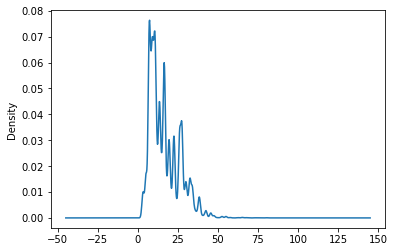

In [11]:
#Plotting variable price
df['price'].plot(kind='kde')

{'whiskers': [<matplotlib.lines.Line2D at 0x2c383533640>,
 'caps': [<matplotlib.lines.Line2D at 0x2c383533d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c3835332e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c38353c400>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c38353c760>],
 'means': []}

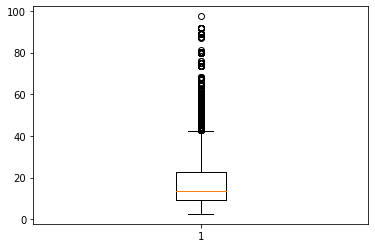

In [12]:
#Plotting variable boxplot
plt.boxplot(df['price'])

## vi. Data Preprocessing
Proses preprosesing data yang kami lakukan adalah: </br>
1. Melakukan encoding dari variabel berjenis kategorikal ke dalam bentuk numerik. Dimana variabel yang dimaksud adalah variabel 'source','destination','cab_type','product_id','name','short_summary','long_summary','icon'
2. Melakukan perhitungan korelasi dari keseluruhan variabel
3. Melakukan evaluasi dari hasil perhitungan korelasi, untuk memilih variabel mana saja yang berkorelasi dengan variabel price
4. Melakukan perhitungan korelasi ulang dari variabel yang sudah terpilih 

In [13]:
#Melihat daftar kolom yang ada
for col in df.columns:
    print(col)

id
timestamp
hour
day
month
datetime
timezone
source
destination
cab_type
product_id
name
price
distance
surge_multiplier
latitude
longitude
temperature
apparentTemperature
short_summary
long_summary
precipIntensity
precipProbability
humidity
windSpeed
windGust
windGustTime
visibility
temperatureHigh
temperatureHighTime
temperatureLow
temperatureLowTime
apparentTemperatureHigh
apparentTemperatureHighTime
apparentTemperatureLow
apparentTemperatureLowTime
icon
dewPoint
pressure
windBearing
cloudCover
uvIndex
visibility.1
ozone
sunriseTime
sunsetTime
moonPhase
precipIntensityMax
uvIndexTime
temperatureMin
temperatureMinTime
temperatureMax
temperatureMaxTime
apparentTemperatureMin
apparentTemperatureMinTime
apparentTemperatureMax
apparentTemperatureMaxTime


In [14]:
#Melakukan encoding dari kolom-kolom yang memiliki nilai kategorikal menjadi numerikal
cat_encoded = df.copy()
cat_encoded = pd.get_dummies(df, columns=['source','destination','cab_type','product_id','name','short_summary','long_summary','icon'], prefix = ['source','destination','cab_type','product_id','name','short_summary','long_summary','icon'])
cat_encoded.head()

,id,timestamp,hour,day,month,datetime,timezone,price,distance,surge_multiplier,...,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.89000,9,16,12,2018-12-16 09:30:07,America/New_York,5.00000,0.44000,1.00000,...,0,1,0,0,0,0,0,0,1,0
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.67700,2,27,11,2018-11-27 02:00:23,America/New_York,11.00000,0.44000,1.00000,...,0,0,1,0,0,0,0,0,0,1
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822.19800,1,28,11,2018-11-28 01:00:22,America/New_York,7.00000,0.44000,1.00000,...,0,0,0,0,1,0,0,0,0,0
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582.74900,4,30,11,2018-11-30 04:53:02,America/New_York,26.00000,0.44000,1.00000,...,0,0,0,0,1,0,0,0,0,0
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360.22300,3,29,11,2018-11-29 03:49:20,America/New_York,9.00000,0.44000,1.00000,...,0,0,0,0,0,0,0,0,1,0


In [15]:
#Melakukan perhitungan korelasi dari keseluruhan parameter
correlate = pd.DataFrame(cat_encoded.corr())
correlate.sort_values(by=['price'], ascending=False, inplace=True)
correlate.head(30)

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
price,0.00081,0.00056,-0.00072,0.00091,1.00000,0.34506,0.24046,0.00209,-0.00142,-0.00008,...,0.00101,0.00121,-0.00046,-0.00067,-0.00235,-0.00073,-0.00005,0.00117,0.00194,-0.00032
name_Lux Black XL,-0.00001,0.00011,-0.00159,0.00107,0.50006,-0.00060,0.06847,0.00254,-0.00115,0.00116,...,-0.00032,-0.00002,-0.00014,0.00009,-0.00134,0.00187,0.00153,-0.00041,0.00020,-0.00171
product_id_lyft_luxsuv,-0.00001,0.00011,-0.00159,0.00107,0.50006,-0.00060,0.06847,0.00254,-0.00115,0.00116,...,-0.00032,-0.00002,-0.00014,0.00009,-0.00134,0.00187,0.00153,-0.00041,0.00020,-0.00171
name_Black SUV,-0.00007,-0.00042,0.00073,-0.00053,0.45310,0.00057,-0.04855,-0.00205,0.00019,0.00131,...,-0.00027,0.00015,-0.00018,-0.00125,-0.00090,0.00055,0.00014,-0.00018,-0.00048,0.00138
product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,-0.00007,-0.00042,0.00073,-0.00053,0.45310,0.00057,-0.04855,-0.00205,0.00019,0.00131,...,-0.00027,0.00015,-0.00018,-0.00125,-0.00090,0.00055,0.00014,-0.00018,-0.00048,0.00138
distance,0.00329,0.00228,-0.00099,0.00240,0.34506,1.00000,0.02595,0.00098,-0.00042,-0.00274,...,0.00108,0.00247,-0.00068,0.00053,-0.00189,-0.00171,-0.00278,0.00243,0.00120,0.00036
surge_multiplier,0.00061,-0.00007,0.00140,-0.00061,0.24046,0.02595,1.00000,0.00147,-0.00196,-0.00159,...,0.00059,-0.00008,-0.00339,0.00142,0.00047,-0.00346,0.00135,0.00256,0.00265,-0.00285
product_id_lyft_lux,0.00038,0.00060,-0.00115,0.00097,0.20654,-0.00060,0.06847,0.00254,-0.00088,-0.00078,...,-0.00139,0.00007,-0.00037,0.00027,-0.00037,0.00114,-0.00020,0.00005,0.00061,-0.00204
name_Lux Black,0.00038,0.00060,-0.00115,0.00097,0.20654,-0.00060,0.06847,0.00254,-0.00088,-0.00078,...,-0.00139,0.00007,-0.00037,0.00027,-0.00037,0.00114,-0.00020,0.00005,0.00061,-0.00204
product_id_6c84fd89-3f11-4782-9b50-97c468b19529,-0.00030,-0.00129,0.00037,-0.00039,0.13119,0.00058,-0.04855,-0.00066,0.00053,-0.00044,...,0.00138,-0.00027,0.00150,-0.00007,-0.00108,-0.00215,0.00044,-0.00009,0.00098,0.00249


Dari hasil perhitungan korelasi pada tabel diatas, dapat disimpulkan bahwa hanya terdapat beberapa parameter yang mempengaruhi parameter price atau harga, yaitu: </br>
1. Distance
2. Surge Multiplier
3. Name
4. Product ID

Sehingga hanya parameter tersebut yang akan kami gunakan, sedangkan untuk parameter lainnya tidak akan kami gunakan.


In [16]:
#Melakukan encoding untuk parameter distance, surge multiplier, name dan product ID serta melakukan perhitungan korelasi ulang
df2 = pd.DataFrame(df, columns=['price','distance','surge_multiplier','product_id','name'])
df3 = df2.copy()
df3 = pd.get_dummies(df3, columns=['product_id','name'], prefix = ['product_id','name'])
cor2 = pd.DataFrame(df3.corr())
cor2.sort_values(by=['price'], ascending=False, inplace=True)
cor2

,price,distance,surge_multiplier,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
price,1.00000,0.34506,0.24046,-0.22355,0.13119,0.45310,-0.02859,-0.25693,-0.22356,-0.21976,...,0.03886,0.20654,0.50006,-0.21976,-0.03916,-0.33324,-0.25693,-0.22355,-0.02859,-0.22356
name_Lux Black XL,0.50006,-0.00060,0.06847,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.08732,...,-0.08732,-0.08732,1.00000,-0.08732,-0.08732,-0.08732,-0.09085,-0.09085,-0.09085,-0.09085
product_id_lyft_luxsuv,0.50006,-0.00060,0.06847,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.08732,...,-0.08732,-0.08732,1.00000,-0.08732,-0.08732,-0.08732,-0.09085,-0.09085,-0.09085,-0.09085
name_Black SUV,0.45310,0.00057,-0.04855,-0.09452,-0.09452,1.00000,-0.09452,-0.09452,-0.09452,-0.09085,...,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09452,-0.09452,-0.09452,-0.09452
product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,0.45310,0.00057,-0.04855,-0.09452,-0.09452,1.00000,-0.09452,-0.09452,-0.09452,-0.09085,...,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09452,-0.09452,-0.09452,-0.09452
distance,0.34506,1.00000,0.02595,0.00058,0.00058,0.00057,0.00057,0.00058,0.00057,-0.00060,...,-0.00060,-0.00060,-0.00060,-0.00060,-0.00060,-0.00059,0.00058,0.00058,0.00057,0.00057
surge_multiplier,0.24046,0.02595,1.00000,-0.04855,-0.04855,-0.04855,-0.04855,-0.04855,-0.04855,0.07116,...,0.06847,0.06847,0.06847,0.07116,0.07116,-0.04666,-0.04855,-0.04855,-0.04855,-0.04855
name_Lux Black,0.20654,-0.00060,0.06847,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.08732,...,-0.08732,1.00000,-0.08732,-0.08732,-0.08732,-0.08732,-0.09085,-0.09085,-0.09085,-0.09085
product_id_lyft_lux,0.20654,-0.00060,0.06847,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.08732,...,-0.08732,1.00000,-0.08732,-0.08732,-0.08732,-0.08732,-0.09085,-0.09085,-0.09085,-0.09085
product_id_6c84fd89-3f11-4782-9b50-97c468b19529,0.13119,0.00058,-0.04855,-0.09452,1.00000,-0.09452,-0.09452,-0.09452,-0.09452,-0.09085,...,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09452,-0.09452,-0.09452,-0.09452


Dari hasil pengecekan ulang tabel korelasi diatas, diketemukan juga bahwa parameter name dan product ID memiliki korelasi yang sama persis, sehingga kami asumsikan kolom tersebut merupakan kolom duplikasi dan oleh karena itu, kolom 'Product ID' tidak kami gunakan.</br>
Sehingga untuk parameter yang kami gunakan dalam pengujian ini adalah:</br>
1. Distance
2. Surge Multiplier
3. Name

In [17]:
#Menghilangkan parameter Product ID dari data yang di encode
df4 = pd.DataFrame(df, columns=['price','distance','surge_multiplier','name'])
df5 = df4.copy()
df5 = pd.get_dummies(df4, columns=['name'], prefix = ['name'])
df5.corr()

,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
price,1.00000,0.34506,0.24046,0.13119,0.45310,0.03886,0.20654,0.50006,-0.21976,-0.03916,-0.33324,-0.25693,-0.22355,-0.02859,-0.22356
distance,0.34506,1.00000,0.02595,0.00058,0.00057,-0.00060,-0.00060,-0.00060,-0.00060,-0.00060,-0.00059,0.00058,0.00058,0.00057,0.00057
surge_multiplier,0.24046,0.02595,1.00000,-0.04855,-0.04855,0.06847,0.06847,0.06847,0.07116,0.07116,-0.04666,-0.04855,-0.04855,-0.04855,-0.04855
name_Black,0.13119,0.00058,-0.04855,1.00000,-0.09452,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09452,-0.09452,-0.09452,-0.09452
name_Black SUV,0.45310,0.00057,-0.04855,-0.09452,1.00000,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09085,-0.09452,-0.09452,-0.09452,-0.09452
name_Lux,0.03886,-0.00060,0.06847,-0.09085,-0.09085,1.00000,-0.08732,-0.08732,-0.08732,-0.08732,-0.08732,-0.09085,-0.09085,-0.09085,-0.09085
name_Lux Black,0.20654,-0.00060,0.06847,-0.09085,-0.09085,-0.08732,1.00000,-0.08732,-0.08732,-0.08732,-0.08732,-0.09085,-0.09085,-0.09085,-0.09085
name_Lux Black XL,0.50006,-0.00060,0.06847,-0.09085,-0.09085,-0.08732,-0.08732,1.00000,-0.08732,-0.08732,-0.08732,-0.09085,-0.09085,-0.09085,-0.09085
name_Lyft,-0.21976,-0.00060,0.07116,-0.09085,-0.09085,-0.08732,-0.08732,-0.08732,1.00000,-0.08732,-0.08732,-0.09085,-0.09085,-0.09085,-0.09085
name_Lyft XL,-0.03916,-0.00060,0.07116,-0.09085,-0.09085,-0.08732,-0.08732,-0.08732,-0.08732,1.00000,-0.08732,-0.09085,-0.09085,-0.09085,-0.09085


## vii. Pendefinisian Model
Proses yang kami lakukan untuk pendefinisian model adalah:</br>
1. Definisi X dan y, dimana kami mendefinisikan variabel price sebagai y dan untuk variabel Distance, Surge Multiplier dan Name sebagai X
2. Train/test split yaitu membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan rasio 80-20.</br>Dimana 80% data akan digunakan untuk training dan 20% data akan digunakan untuk testing
3. Pendefinisian Model yaitu menggunakan Linear Regression


In [18]:
#Melakukan Pendefinisian X dan y
y = df5['price'].values
X = df5.drop(columns=['price'],axis=1).values

In [19]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [20]:
#Pendefinisian Model
lin2 = linear_model.LinearRegression()

## viii. Pelatihan Model
Permodelan yang kami lakukan dalam proyek ini adalah: </br> 
1. Model Fitting/Training
2. Model Output berupa koefisien dari masing-masing variabel X dan nilai intercept

In [21]:
#Model Fitting
model = lin2.fit(X_train,y_train)

In [22]:
#Koefisien dari masing-masing parameter
params = pd.Series(model.coef_, index=df5.drop(columns=['price'],axis=1).columns)
params

distance                       2.79853
surge_multiplier              18.27421
name_Black          439201468135.63281
name_Black SUV      439201468145.39130
name_Lux            439201468132.20557
name_Lux Black      439201468137.48834
name_Lux Black XL   439201468146.78101
name_Lyft           439201468124.02271
name_Lyft XL        439201468129.71887
name_Shared         439201468121.14441
name_UberPool       439201468123.86060
name_UberX          439201468124.87402
name_UberXL         439201468130.77747
name_WAV            439201468124.86133
dtype: float64

In [23]:
#Nilai Intercept
print(lin2.intercept_)

-439201468139.50714


In [24]:
#Nilai Akurasi dari model
lin2.score(X_test, y_test)

0.9282101184372347

In [25]:
#Proses prediksi nilai Y berdasarkan variabel X_test
y_pred = lin2.predict(X_test)

Dari hasil model, didapatkan hasil tabel koefisien untuk setiap parameter seperti diatas. Dan dapat diintrepretasikan menjadi: </br>
1. Untuk setiap kenaikan 1 dari parameter 'distance' akan menaikkan 'price' sebesar 2.79853 </br>
2. Untuk setiap kenaikan 1 dari 'surge multiplier' akan menaikkan 'price' sebesar 18.27421</br>
3. Parameter Name mempengaruhi harga sekitar 439.201.468.121 - 439.201.468.146 tergantung dari masing-masing jenisnya</br>
4. Nilai intercept sebesar -439.201.468.139.50714

## ix. Evaluasi Model
Untuk mengevaluasi model, kami menggunakan:</br>
1. Mean Absolute Error (MAE) yaitu nilai rata-rata perbedaan antara price prediksi dengan price aktual
2. Mean Squared error (MSE) yaitu nilai kuadrat dari rata-rata perbedaan antara price prediksi dengan price aktual
3. Root Mean Squared Error yaitu nilai akar dari kuadrat dari rata-rata perbedaan antara price prediksi dengan price aktual.
4. R Square yaitu koefisien determinasi yang menjelaskan seberapa jauh data dependen dapat dijelaskan oleh data independen

In [26]:
#Definisikan hasil prediksi dari linear model
predicted = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
predicted.head()

,Actual,Predicted
0,19.50000,21.06036
1,10.50000,11.55951
2,5.00000,8.19513
3,16.50000,16.84955
4,38.50000,33.43994


In [27]:
#Perhitungan nilai MAE, MSE dan RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Square Value:', r2_score(y_test,y_pred))

Mean Absolute Error: 1.7663318338534382
Mean Squared Error: 6.1737109011081115
Root Mean Squared Error: 2.484695333659262
R Square Value: 0.9282101184372347


Dari hasil perhitungan diatas, dapat diambil kesimpulan bahwa:</br>
1. Nilai MAE sebesar 1.76 yang berarti rata-rata perbedaan nilai price actual dengan price prediksi adalah sebesar 1.76 
2. Nilai MSE sebesar 6.17 yang berarti kuadrat dari perbedaan nilai price actual dengan price prediksi adalah sebesar 6.17
3. Nilai RMSE sebesar 2.48 yang berarti nilai akar dari kuadrat perbedaan nilai price actual dengan price prediksi adalah sebesar 2.48
4. Nilai R Squared sebesar 92.8% yang berarti 92.8% sebaran variabel dependen dapat dijelaskan oleh variabel independen</br>

Nilai MAE, MSE dan RMSE dikatakan bagus apabila nilai tersebut rendah. Sedangkan nilai R Square dikatakan bagus apabila memiliki nilai tinggi atau mendekati 1</br>
Dikarenakan model tersebut memiliki nilai MAE,MSE,RMSE yang rendah dan nilai R Square yang tinggi, maka dapat dikatakan model yang dibuat sudah dapat dipakai 


## x. Model Inference
Model inference merupakan proses pencobaan model yang sudah dibuat kedalam dataset baru. </br>
Dataset baru yang kami gunakan untuk pengujian ini merupakan sampel data sebesar 100 baris database yang sudah kami siapkan</br>
Pada proses ini kami akan melakukan: </br>
1. Loading data baru yaitu data sampel
2. Encoding dari kolom name yang berupa kategorikal
3. Pendefinisian parameter distance, surge multiplier dan name dari data sampel menjadi variabel X baru
4. Prediksi nilai price berdasarkan variabel X baru dengan menggunakan model yang lama
5. Memasukkan nilai price prediksi kedalam data sampel

In [28]:
#Proses loading data sampel
newdata = pd.read_csv('ridesharesample.csv')
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              100 non-null    object 
 1   price             100 non-null    float64
 2   distance          100 non-null    float64
 3   surge_multiplier  100 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [29]:
#Proses encoding dari kolom name
newdf = pd.get_dummies(newdata, columns=['name'], prefix = ['name'])
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              100 non-null    float64
 1   distance           100 non-null    float64
 2   surge_multiplier   100 non-null    float64
 3   name_Black         100 non-null    uint8  
 4   name_Black SUV     100 non-null    uint8  
 5   name_Lux           100 non-null    uint8  
 6   name_Lux Black     100 non-null    uint8  
 7   name_Lux Black XL  100 non-null    uint8  
 8   name_Lyft          100 non-null    uint8  
 9   name_Lyft XL       100 non-null    uint8  
 10  name_Shared        100 non-null    uint8  
 11  name_UberPool      100 non-null    uint8  
 12  name_UberX         100 non-null    uint8  
 13  name_UberXL        100 non-null    uint8  
 14  name_WAV           100 non-null    uint8  
dtypes: float64(3), uint8(12)
memory usage: 3.6 KB


In [30]:
#Proses pendefinisian variabel distance, surge multiplier dan name dari data sampel sebagai variabel X yang baru
newX = newdf.drop(columns=['price'],axis=1).values

In [31]:
#Proses pemanggilan model yang sudah dibuat untuk memprediksi nilai price dari dataset baru
newy = lin2.predict(newX)
newy

array([29.71789551, 19.24981689,  8.32989502,  4.22119141, 11.86279297,
       22.34771729, 13.77032471, 23.05584717, 15.91107178, 15.66296387,
       21.18786621, 14.515625  , 33.66381836,  4.78088379, 29.13018799,
       19.19384766, 12.16387939,  6.99334717,  5.86816406, 10.07171631,
       30.47344971, 18.04644775, 14.91156006, 29.24212646, 12.06463623,
       17.18450928, 10.68164062, 21.82446289,  9.61724854, 26.93725586,
        5.37023926, 15.48223877, 18.38452148,  5.61627197, 22.08190918,
       12.81964111, 19.83972168, 15.34234619,  4.7767334 , 20.22930908,
       16.98858643, 24.09771729, 18.27679443, 27.5725708 , 26.71337891,
       34.18682861, 11.21240234, 23.92333984, 28.54248047,  5.16760254,
       25.15472412,  5.03442383, 11.13519287, 15.28149414, 14.13897705,
        6.26574707,  6.88739014,  4.16687012, 22.91589355,  9.25854492,
        4.22119141, 34.1675415 , 13.7711792 , 11.30310059, 22.97186279,
       14.83459473, 19.815979  , 32.10620117, 11.21331787, 31.20

In [32]:
#Proses penginputan hasil prediksi nilai price kedalam dataset baru
newdf.insert(loc=1, column='pricepredict', value=newy)


In [33]:
#Proses pemeriksaan dataset baru yang sudah dilengkapi dengan nilai price yang sudah diprediksikan
newdf.head()

,price,pricepredict,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,26.00000,29.71790,1.49000,1.00000,0,0,0,0,1,0,0,0,0,0,0,0
1,16.50000,19.24982,1.07000,1.00000,0,0,0,1,0,0,0,0,0,0,0,0
2,8.00000,8.32990,1.68000,1.00000,0,0,0,0,0,0,0,0,0,0,0,1
3,5.00000,4.22119,1.54000,1.00000,0,0,0,0,0,0,0,1,0,0,0,0
4,9.00000,11.86279,3.30000,1.00000,0,0,0,0,0,0,0,0,1,0,0,0


## xi. Kesimpulan
1. Menggunakan data penggunaan uber dan lyft, kami melakukan percobaan untuk memprediksi nilai price berdasarkan parameter-parameter lainnya
2. Dari proses data cleaning tidak ditemukan data duplikat, namun ditemukan 55095 missing values dimana untuk baris yang memiliki missing values tersebut akan dihapus.
3. Eksplorasi data dilakukan dengan menghitung Measure of Central Tendency, Distribution and Density dan Measure of Variability dari dari parameter price
4. Proses preprosesing data dilakukan dengan melakukan encoding dan perhitungan korelasi antar parameter. </br>
Dan ditemukan 3 parameter yang memiliki korelasi cukup besar terhadap nilai price yaitu Distance, Surge Multiplier dan Name.
5. Kami membuat model menggunakan regresi linear. Nilai Price kami tetapkan sebagai variabel y, sedangkan nilai Distance, Surge Multiplier dan Name kami tetapkan sebagai variabel X. Kami juga melakukan train/test split dengan rasio 80-20
6. Dari hasil model, didapatkan hasil tabel koefisien untuk setiap parameter yang dapat diintrepretasikan menjadi: </br>
    1. Untuk setiap kenaikan 1 dari parameter 'distance' akan menaikkan 'price' sebesar 2.79853 </br>
    2. Untuk setiap kenaikan 1 dari 'surge multiplier' akan menaikkan 'price' sebesar 18.27421</br>
    3. Parameter Name mempengaruhi harga sekitar 439.201.468.121 - 439.201.468.146 tergantung dari masing-masing jenisnya</br>
    4. Nilai intercept sebesar -439.201.468.139.50714
7. Model tersebut kemudian kami lakukan evaluasi, dan memiliki hasil:</br>
    1. Nilai MAE sebesar 1.76 yang berarti rata-rata perbedaan nilai price actual dengan price prediksi adalah sebesar 1.76 
    2. Nilai MSE sebesar 6.17 yang berarti kuadrat dari perbedaan nilai price actual dengan price prediksi adalah sebesar 6.17
    3. Nilai RMSE sebesar 2.48 yang berarti nilai akar dari kuadrat perbedaan nilai price actual dengan price prediksi adalah sebesar 2.48
    4. Nilai R Squared sebesar 92.8% yang berarti 92.8% sebaran variabel dependen dapat dijelaskan oleh variabel independen</br>
    5. Dikarenakan model tersebut memiliki nilai MAE,MSE,RMSE yang rendah dan nilai R Square yang tinggi, maka dapat dikatakan model yang dibuat sudah dapat dipakai </br>
8. Kami melakukan percobaan model pada data baru yang sudah kami persiapkan sebelumnya. </br>
Kami melakukan prediksi dari nilai price berdasarkan variabel distance, surge multiplier dan name dari data baru. </br>
Hasil dari nilai price yang sudah diprediksi tersebut kemudian kami masukkan ke dalam data baru tersebut.